# 잔액정보 EDA

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 목록을 갱신하고, 'NanumGothic' 폰트를 기본 폰트로 설정합니다.
font_path = 'C:/Windows/Fonts/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import sys
sys.path.append('../utils')

## 데이터 로드

In [2]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from preprocessing import (
    DateElapsedTransformer, NumericFeaturePreprocessor, ObjectFeaturePreprocessor, NumericTypeOptimizer,
)

pre_optimizer = NumericTypeOptimizer(mode='pre')
date_transformer = DateElapsedTransformer()
numeric_transformer = NumericFeaturePreprocessor()
object_transformer = ObjectFeaturePreprocessor()
post_optimizer = NumericTypeOptimizer(mode='post')

preprocessing_pipeline = Pipeline([
    ('pre_optimizer', pre_optimizer),
    ('object', object_transformer),
    ('date', date_transformer),
    ('numeric', numeric_transformer),
    ('post_optimizer', post_optimizer),
])

# Set display configuration to visualize the pipeline
set_config(display='diagram')

# Display the pipeline
preprocessing_pipeline

Pipeline(steps=[('pre_optimizer', NumericTypeOptimizer(mode='pre')),
                ('object',
                 ObjectFeaturePreprocessor(exclude_columns=['ID', 'Segment'])),
                ('date',
                 DateElapsedTransformer(base_date=Timestamp('2019-01-01 00:00:00'),
                                        exclude_columns=['ID', 'Segment',
                                                         '기준년월'])),
                ('numeric',
                 NumericFeaturePreprocessor(exclude_columns=['기준년월'])),
                ('post_optimizer', NumericTypeOptimizer())])

In [3]:
from sklearn.preprocessing import LabelEncoder
from data_loader import load_data

balance_df, balance_test_df = load_data("5.잔액정보")

X = balance_df.drop(columns=['ID', '기준년월'])
X = preprocessing_pipeline.fit_transform(X)
X.info()

✅ File: ../../dataset/train/5.잔액정보\201807_train_잔액정보.parquet Completed!
✅ File: ../../dataset/train/5.잔액정보\201808_train_잔액정보.parquet Completed!
✅ File: ../../dataset/train/5.잔액정보\201809_train_잔액정보.parquet Completed!
✅ File: ../../dataset/train/5.잔액정보\201810_train_잔액정보.parquet Completed!
✅ File: ../../dataset/train/5.잔액정보\201811_train_잔액정보.parquet Completed!
✅ File: ../../dataset/train/5.잔액정보\201812_train_잔액정보.parquet Completed!
🔹 Shape : (2400000, 82)

✅ File: ../../dataset/test/5.잔액정보\201807_test_잔액정보.parquet Completed!
✅ File: ../../dataset/test/5.잔액정보\201808_test_잔액정보.parquet Completed!
✅ File: ../../dataset/test/5.잔액정보\201809_test_잔액정보.parquet Completed!
✅ File: ../../dataset/test/5.잔액정보\201810_test_잔액정보.parquet Completed!
✅ File: ../../dataset/test/5.잔액정보\201811_test_잔액정보.parquet Completed!
✅ File: ../../dataset/test/5.잔액정보\201812_test_잔액정보.parquet Completed!
🔹 Shape : (600000, 82)
Numeric Type Optimizer Transforming...
🧠 [mode=pre] 메모리 최적화: 1464.84 MB → 565.34 MB (61.4% 감소)
Objec

In [6]:
X.select_dtypes(include=['object']).columns.tolist()

[]

In [4]:
balance_df = optimize_numeric_types(balance_df, verbose=True)
balance_test_df = optimize_numeric_types(balance_test_df, verbose=True)

🔹 메모리 사용량: 1641.08 MB → 723.27 MB  (55.9% 감소)
🔹 메모리 사용량: 409.13 MB → 173.95 MB  (57.5% 감소)


In [5]:
balance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 82 columns):
 #   Column             Dtype  
---  ------             -----  
 0   기준년월               uint32 
 1   ID                 object 
 2   잔액_일시불_B0M         uint32 
 3   잔액_할부_B0M          uint32 
 4   잔액_현금서비스_B0M       uint32 
 5   잔액_리볼빙일시불이월_B0M    uint16 
 6   잔액_리볼빙CA이월_B0M     uint16 
 7   잔액_카드론_B0M         uint32 
 8   월중평잔_일시불_B0M       uint32 
 9   월중평잔_할부_B0M        uint32 
 10  월중평잔_CA_B0M        uint32 
 11  카드론잔액_최종경과월        uint8  
 12  연체일자_B0M           float32
 13  연체잔액_B0M           uint16 
 14  연체잔액_일시불_B0M       uint16 
 15  연체잔액_할부_B0M        uint16 
 16  연체잔액_현금서비스_B0M     uint16 
 17  연체잔액_카드론_B0M       uint16 
 18  연체잔액_대환론_B0M       uint16 
 19  잔액_현금서비스_B1M       uint32 
 20  잔액_현금서비스_B2M       uint32 
 21  잔액_카드론_B1M         uint32 
 22  잔액_카드론_B2M         uint32 
 23  잔액_카드론_B3M         uint32 
 24  잔액_카드론_B4M         uint32 
 25  잔액_카드론_B5M        

In [7]:
object_columns = balance_df.select_dtypes(include=['object']).columns
object_columns

Index(['ID'], dtype='object')

In [8]:
float_columns = balance_df.select_dtypes(include=['float']).columns
float_columns

Index(['연체일자_B0M'], dtype='object')

In [9]:
float_unique_values = {col: balance_df[col].unique() for col in float_columns}
float_unique_values

{'연체일자_B0M': array([      nan, 20180504., 20180520., 20180526., 20180500., 20180424.,
        20180524., 20180412., 20180512., 20180416., 20180502., 20180516.,
        20180508., 20180418., 20180428., 20180420., 20180514., 20180518.,
        20180422., 20180522., 20180430., 20180410., 20180414., 20180510.,
        20180426., 20180408., 20180506., 20180528., 20180604., 20180618.,
        20180614., 20180608., 20180610., 20180532., 20180612., 20180602.,
        20180530., 20180600., 20180616., 20180620., 20180606., 20180624.,
        20180622., 20180716., 20180708., 20180702., 20180628., 20180704.,
        20180706., 20180700., 20180626., 20180712., 20180710., 20180714.,
        20180630., 20180718., 20180720., 20180722., 20180724., 20180804.,
        20180808., 20180728., 20180732., 20180818., 20180812., 20180802.,
        20180800., 20180806., 20180730., 20180726., 20180810., 20180816.,
        20180814., 20180820., 20180916., 20180902., 20180830., 20180832.,
        20180828., 2018091

In [11]:
# datetime 변환
balance_df['연체일자_B0M'] = pd.to_datetime(balance_df['연체일자_B0M'], format='%Y%m%d', errors='coerce')

# 기준일
today = pd.to_datetime('2019-01-01')

new_cols = pd.DataFrame({
    '연체연도': balance_df['연체일자_B0M'].dt.year,
    '연체월': balance_df['연체일자_B0M'].dt.month,
    '연체일': balance_df['연체일자_B0M'].dt.day,
    '연쳬_경과일수': (today - balance_df['연체일자_B0M']).dt.days,
})

balance_df = pd.concat([balance_df, new_cols], axis=1)
balance_df = balance_df.drop(columns=['연체일자_B0M'], axis=1)

balance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 85 columns):
 #   Column             Dtype  
---  ------             -----  
 0   기준년월               uint32 
 1   ID                 object 
 2   잔액_일시불_B0M         uint32 
 3   잔액_할부_B0M          uint32 
 4   잔액_현금서비스_B0M       uint32 
 5   잔액_리볼빙일시불이월_B0M    uint16 
 6   잔액_리볼빙CA이월_B0M     uint16 
 7   잔액_카드론_B0M         uint32 
 8   월중평잔_일시불_B0M       uint32 
 9   월중평잔_할부_B0M        uint32 
 10  월중평잔_CA_B0M        uint32 
 11  카드론잔액_최종경과월        uint8  
 12  연체잔액_B0M           uint16 
 13  연체잔액_일시불_B0M       uint16 
 14  연체잔액_할부_B0M        uint16 
 15  연체잔액_현금서비스_B0M     uint16 
 16  연체잔액_카드론_B0M       uint16 
 17  연체잔액_대환론_B0M       uint16 
 18  잔액_현금서비스_B1M       uint32 
 19  잔액_현금서비스_B2M       uint32 
 20  잔액_카드론_B1M         uint32 
 21  잔액_카드론_B2M         uint32 
 22  잔액_카드론_B3M         uint32 
 23  잔액_카드론_B4M         uint32 
 24  잔액_카드론_B5M         uint32 
 25  잔액_할부_B1M         

In [12]:
# datetime 변환
balance_test_df['연체일자_B0M'] = pd.to_datetime(balance_test_df['연체일자_B0M'], format='%Y%m%d', errors='coerce')

# 기준일
today = pd.to_datetime('2019-01-01')

new_cols = pd.DataFrame({
    '연체연도': balance_test_df['연체일자_B0M'].dt.year,
    '연체월': balance_test_df['연체일자_B0M'].dt.month,
    '연체일': balance_test_df['연체일자_B0M'].dt.day,
    '연쳬_경과일수': (today - balance_test_df['연체일자_B0M']).dt.days,
})

balance_test_df = pd.concat([balance_test_df, new_cols], axis=1)
balance_test_df = balance_test_df.drop(columns=['연체일자_B0M'], axis=1)

balance_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   기준년월               600000 non-null  uint32 
 1   ID                 600000 non-null  object 
 2   잔액_일시불_B0M         600000 non-null  uint32 
 3   잔액_할부_B0M          600000 non-null  uint16 
 4   잔액_현금서비스_B0M       600000 non-null  uint32 
 5   잔액_리볼빙일시불이월_B0M    600000 non-null  uint16 
 6   잔액_리볼빙CA이월_B0M     600000 non-null  uint16 
 7   잔액_카드론_B0M         600000 non-null  uint32 
 8   월중평잔_일시불_B0M       600000 non-null  uint32 
 9   월중평잔_할부_B0M        600000 non-null  uint32 
 10  월중평잔_CA_B0M        600000 non-null  uint32 
 11  카드론잔액_최종경과월        600000 non-null  uint8  
 12  연체잔액_B0M           600000 non-null  uint16 
 13  연체잔액_일시불_B0M       600000 non-null  uint16 
 14  연체잔액_할부_B0M        600000 non-null  uint16 
 15  연체잔액_현금서비스_B0M     600000 non-null  uint16 
 16  연체

In [13]:
new_columns = ['연체연도', '연체월', '연체일', '연쳬_경과일수']
for col in new_columns:
    balance_df[col] = balance_df[col].fillna(0).astype('int16')
    balance_test_df[col] = balance_test_df[col].fillna(0).astype('int16')

In [14]:
segment_df = pd.read_parquet('../dataset/train/member.parquet', engine='fastparquet')
segment_df = segment_df[['ID', '기준년월', 'Segment']]

balance_df = balance_df.merge(segment_df, on=['ID', '기준년월'], how='left')

## Feature Selection

In [15]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

def get_feature_importance(X, y, importance_type='gain', plot_top_n=30):
    """
    LightGBM을 이용해 Feature Importance를 계산하고, 상위 feature를 시각화합니다.
    
    Parameters:
    - X (pd.DataFrame): feature 데이터
    - y (pd.Series or np.array): target 데이터
    - importance_type (str): 'gain' 또는 'split' (중요도 기준)
    - plot_top_n (int): 중요도가 높은 feature 몇 개를 plot할지
    - random_state (int): seed 고정

    Returns:
    - feature_importance_df (pd.DataFrame): feature importance 데이터프레임
    - model (lgb.Booster): 학습된 LightGBM 모델
    """

    # LightGBM 데이터셋 구성
    lgb_train = lgb.Dataset(X, label=y)

    # LightGBM 기본 파라미터 (가볍게 학습)
    params = {
        'objective': 'multiclass',   # 다중 클래스 분류
        'num_class': 5,  # 클래스 수 자동 지정
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',   # 다중 클래스 로지 손실
        'verbosity': -1,
        'seed': 42,
        'learning_rate': 0.05,
        'num_leaves': 31,
        'min_data_in_leaf': 20
    }

    # 빠르게 학습 (에포크 100회로 제한)
    model = lgb.train(params, lgb_train, num_boost_round=100)

    # Feature Importance 가져오기
    importance = model.feature_importance(importance_type=importance_type)
    feature_names = X.columns

    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    # 시각화
    top_features = feature_importance_df.head(plot_top_n)
    
    plt.figure(figsize=(10, max(6, plot_top_n // 2)))
    plt.barh(top_features['feature'][::-1], top_features['importance'][::-1])
    plt.xlabel('Importance')
    plt.title(f'Top {plot_top_n} Feature Importance ({importance_type})')
    plt.tight_layout()
    plt.show()

    return feature_importance_df, model

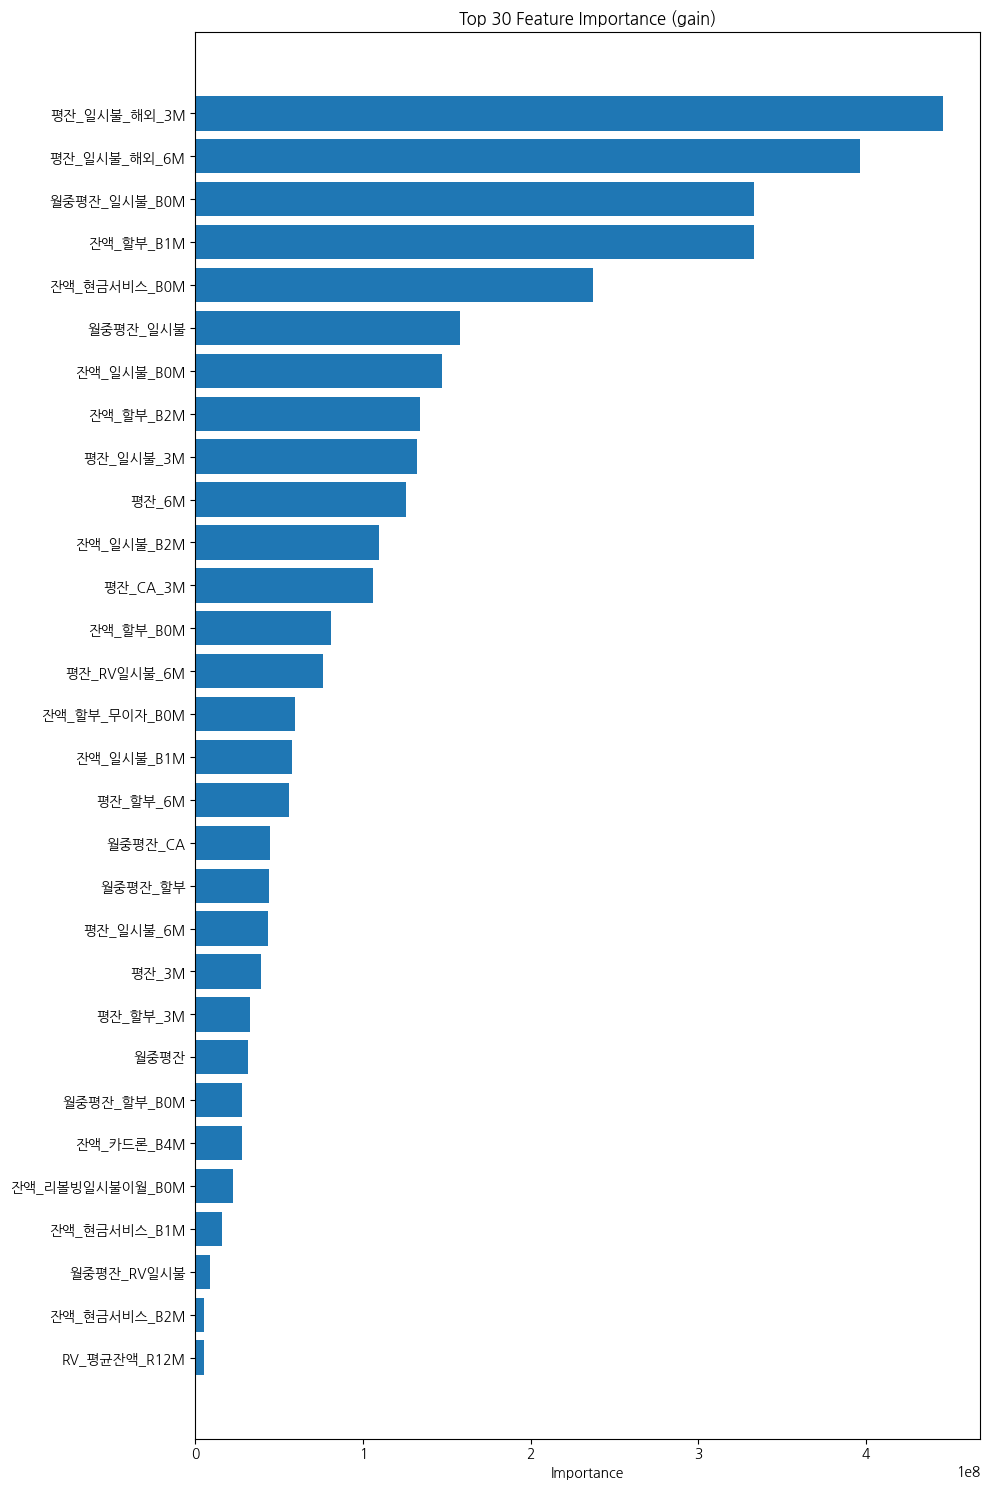

In [16]:
X = balance_df.drop(columns=['ID', '기준년월', 'Segment'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(balance_df['Segment'])

importance_df, model = get_feature_importance(X, y, importance_type='gain', plot_top_n=30)

In [17]:
def select_top_features(importance_df, X, top_percent=0.3):
    """
    중요도 데이터프레임에서 상위 top_percent 비율만큼 feature를 선택하여 데이터셋 추출

    Parameters:
    - importance_df (pd.DataFrame): feature와 importance를 가진 데이터프레임
    - X (pd.DataFrame): 원본 feature 데이터셋
    - top_percent (float): 상위 몇 %를 선택할지 (기본 30%)

    Returns:
    - X_top (pd.DataFrame): 상위 feature만 선택된 데이터프레임
    - selected_features (list): 선택된 feature 리스트
    """
    n_features = int(len(importance_df) * top_percent)
    selected_features = importance_df['feature'].iloc[:n_features].tolist()
    X_top = X[selected_features]
    return X_top, selected_features

In [18]:
X_top, selected_features = select_top_features(importance_df, X, top_percent=0.3)
print(f"🔹 선택된 feature 수: {len(selected_features)}")
print(f"🔹 선택된 feature: {selected_features}")

🔹 선택된 feature 수: 24
🔹 선택된 feature: ['평잔_일시불_해외_3M', '평잔_일시불_해외_6M', '월중평잔_일시불_B0M', '잔액_할부_B1M', '잔액_현금서비스_B0M', '월중평잔_일시불', '잔액_일시불_B0M', '잔액_할부_B2M', '평잔_일시불_3M', '평잔_6M', '잔액_일시불_B2M', '평잔_CA_3M', '잔액_할부_B0M', '평잔_RV일시불_6M', '잔액_할부_무이자_B0M', '잔액_일시불_B1M', '평잔_할부_6M', '월중평잔_CA', '월중평잔_할부', '평잔_일시불_6M', '평잔_3M', '평잔_할부_3M', '월중평잔', '월중평잔_할부_B0M']


In [19]:
def plot_feature_correlation(X_top, threshold=0.8):
    """
    상위 feature들 간의 상관계수 행렬을 시각화하고, 
    threshold 이상인 feature쌍을 출력

    Parameters:
    - X_top (pd.DataFrame): 상위 feature 데이터프레임
    - threshold (float): 높은 상관관계로 간주할 기준
    """
    # 수치치형 feature만 선택
    numeric_features = X_top.select_dtypes(include=['number'])
    corr_matrix = numeric_features.corr()
    print(" 상관계수 행렬 생성 완료..!")

    # 상관관계 히트맵 그리기
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Top Features')
    plt.show()

    # threshold 이상인 feature 쌍 출력
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    if high_corr_pairs:
        print(f"\n상관계수 {threshold} 이상인 feature 쌍:")
        for f1, f2, corr in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
            print(f"🔹{f1} vs {f2}: 상관계수 = {corr:.3f}")
    else:
        print(f"\n상관계수 {threshold} 이상인 feature 쌍이 없습니다.")
    
    return high_corr_pairs

 상관계수 행렬 생성 완료..!


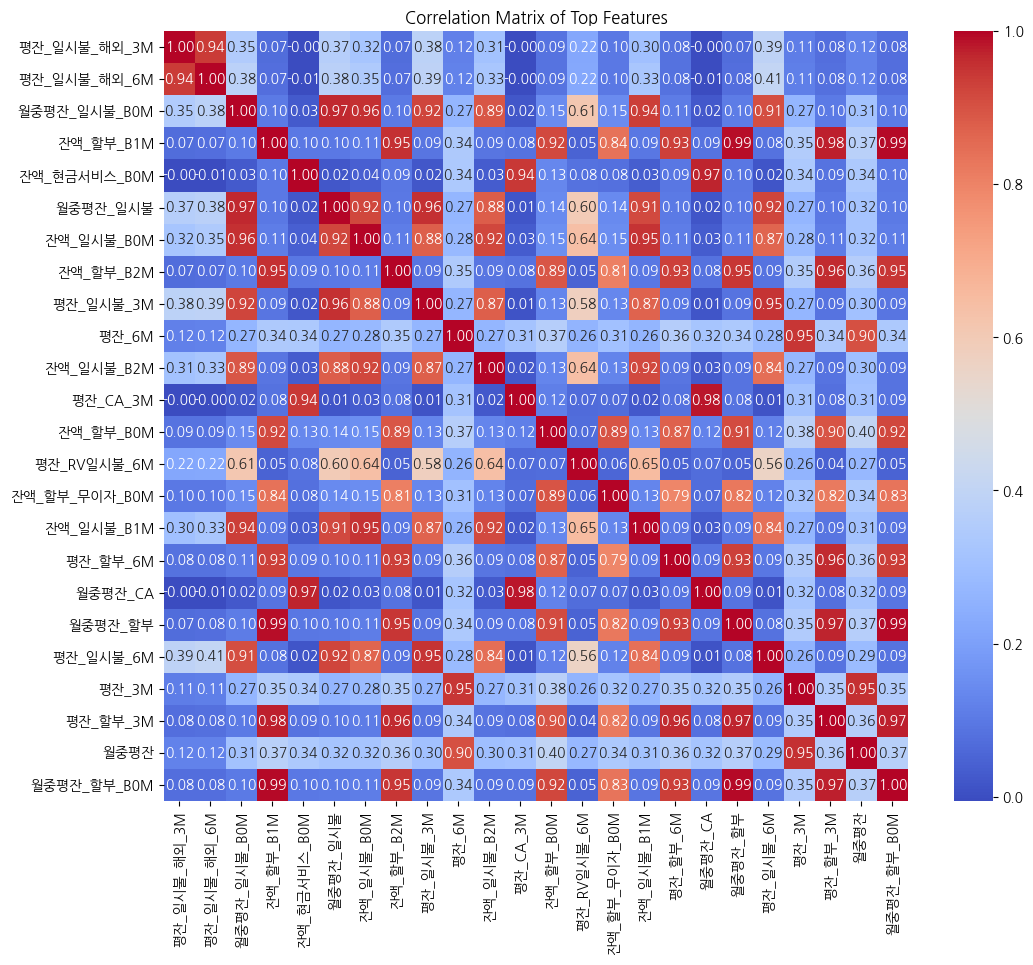


상관계수 0.8 이상인 feature 쌍:
🔹월중평잔_할부_B0M vs 월중평잔_할부: 상관계수 = 0.994
🔹월중평잔_할부_B0M vs 잔액_할부_B1M: 상관계수 = 0.992
🔹월중평잔_할부 vs 잔액_할부_B1M: 상관계수 = 0.989
🔹월중평잔_CA vs 평잔_CA_3M: 상관계수 = 0.980
🔹평잔_할부_3M vs 잔액_할부_B1M: 상관계수 = 0.975
🔹월중평잔_할부_B0M vs 평잔_할부_3M: 상관계수 = 0.973
🔹평잔_할부_3M vs 월중평잔_할부: 상관계수 = 0.972
🔹월중평잔_CA vs 잔액_현금서비스_B0M: 상관계수 = 0.969
🔹월중평잔_일시불 vs 월중평잔_일시불_B0M: 상관계수 = 0.966
🔹평잔_할부_3M vs 평잔_할부_6M: 상관계수 = 0.962
🔹평잔_할부_3M vs 잔액_할부_B2M: 상관계수 = 0.962
🔹평잔_일시불_3M vs 월중평잔_일시불: 상관계수 = 0.956
🔹잔액_일시불_B0M vs 월중평잔_일시불_B0M: 상관계수 = 0.955
🔹월중평잔 vs 평잔_3M: 상관계수 = 0.954
🔹잔액_할부_B2M vs 잔액_할부_B1M: 상관계수 = 0.954
🔹평잔_일시불_6M vs 평잔_일시불_3M: 상관계수 = 0.951
🔹잔액_일시불_B1M vs 잔액_일시불_B0M: 상관계수 = 0.950
🔹월중평잔_할부_B0M vs 잔액_할부_B2M: 상관계수 = 0.948
🔹평잔_3M vs 평잔_6M: 상관계수 = 0.948
🔹월중평잔_할부 vs 잔액_할부_B2M: 상관계수 = 0.946
🔹평잔_CA_3M vs 잔액_현금서비스_B0M: 상관계수 = 0.943
🔹평잔_일시불_해외_6M vs 평잔_일시불_해외_3M: 상관계수 = 0.939
🔹잔액_일시불_B1M vs 월중평잔_일시불_B0M: 상관계수 = 0.936
🔹월중평잔_할부_B0M vs 평잔_할부_6M: 상관계수 = 0.933
🔹평잔_할부_6M vs 잔액_할부_B1M: 상관계수 = 0.933
🔹평잔_할부_6M vs 잔액_할부_B2M: 상관계수 = 

In [20]:
# 상관계수 0.8 이상인 feature 쌍을 시각화
high_corr_pairs = plot_feature_correlation(X_top, threshold=0.8)

In [21]:
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
high_corr_pairs

[('월중평잔_할부_B0M', '월중평잔_할부', np.float64(0.9935293713441026)),
 ('월중평잔_할부_B0M', '잔액_할부_B1M', np.float64(0.9922174386079001)),
 ('월중평잔_할부', '잔액_할부_B1M', np.float64(0.9888876344830283)),
 ('월중평잔_CA', '평잔_CA_3M', np.float64(0.9803762441133366)),
 ('평잔_할부_3M', '잔액_할부_B1M', np.float64(0.9753337942961781)),
 ('월중평잔_할부_B0M', '평잔_할부_3M', np.float64(0.9728900099272186)),
 ('평잔_할부_3M', '월중평잔_할부', np.float64(0.9716207253262881)),
 ('월중평잔_CA', '잔액_현금서비스_B0M', np.float64(0.9689780932163029)),
 ('월중평잔_일시불', '월중평잔_일시불_B0M', np.float64(0.9660306021266828)),
 ('평잔_할부_3M', '평잔_할부_6M', np.float64(0.9619281665614791)),
 ('평잔_할부_3M', '잔액_할부_B2M', np.float64(0.961724924909168)),
 ('평잔_일시불_3M', '월중평잔_일시불', np.float64(0.9558702372752126)),
 ('잔액_일시불_B0M', '월중평잔_일시불_B0M', np.float64(0.9552259885978981)),
 ('월중평잔', '평잔_3M', np.float64(0.9544084174573487)),
 ('잔액_할부_B2M', '잔액_할부_B1M', np.float64(0.954117498310497)),
 ('평잔_일시불_6M', '평잔_일시불_3M', np.float64(0.9507015737208545)),
 ('잔액_일시불_B1M', '잔액_일시불_B0M', np.float

In [22]:
features_to_drop = set()
for f1, f2, corr in high_corr_pairs:
    if corr > 0.9:
        if f1 not in features_to_drop and f2 not in features_to_drop:
            features_to_drop.add(f1)

features_to_drop

{'월중평잔',
 '월중평잔_CA',
 '월중평잔_일시불',
 '월중평잔_할부',
 '월중평잔_할부_B0M',
 '잔액_일시불_B0M',
 '잔액_일시불_B1M',
 '잔액_할부_B0M',
 '잔액_할부_B2M',
 '평잔_3M',
 '평잔_CA_3M',
 '평잔_일시불_3M',
 '평잔_일시불_6M',
 '평잔_일시불_해외_6M',
 '평잔_할부_3M',
 '평잔_할부_6M'}

In [23]:
for col in features_to_drop:
    X_top = X_top.drop(columns=[col])

X_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   평잔_일시불_해외_3M   uint16
 1   월중평잔_일시불_B0M   uint32
 2   잔액_할부_B1M      uint32
 3   잔액_현금서비스_B0M   uint32
 4   평잔_6M          uint32
 5   잔액_일시불_B2M     uint32
 6   평잔_RV일시불_6M    uint32
 7   잔액_할부_무이자_B0M  uint32
dtypes: uint16(1), uint32(7)
memory usage: 68.7 MB


In [24]:
filtered_balance_df = balance_df[['ID', '기준년월'] + X_top.columns.tolist()]
filtered_balance_df.to_parquet('../dataset/train/balance.parquet', index=False)

filtered_balance_test_df = balance_test_df[['ID', '기준년월'] + X_top.columns.tolist()]
filtered_balance_test_df.to_parquet('../dataset/test/balance.parquet', index=False)